In [2]:
#Importing Numpy library
import numpy as np

### Input Features
Having three input features and the corresponding output is first number.
We have taken 16 data points in the current study.

In [3]:
#Define input features :
input_features = np.array([[1,7,3],[2,8,4],[3,9,3],[4,6,5],[5,4,5],[6,4,5],[7,6,1],[8,5,3],
                           [1,4,2],[2,5,3],[3,4,8],[4,3,1],[5,1,2],[6,6,3],[7,1,9],[8,3,2]])
input_features.shape
input_features

array([[1, 7, 3],
       [2, 8, 4],
       [3, 9, 3],
       [4, 6, 5],
       [5, 4, 5],
       [6, 4, 5],
       [7, 6, 1],
       [8, 5, 3],
       [1, 4, 2],
       [2, 5, 3],
       [3, 4, 8],
       [4, 3, 1],
       [5, 1, 2],
       [6, 6, 3],
       [7, 1, 9],
       [8, 3, 2]])

### Target Output
We divided the output from 10 to normalize it between 0 and 1. As the output of sigmoid function is between 0 and 1.

In [4]:
target_output = np.array([1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8,])# Reshaping our target output into vector :
target_output = target_output.reshape(16,1)
target_output=target_output/10
target_output.shape
target_output

array([[0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8]])

### Initialising random weights
There is one hidden layer with four nodes and one output layer with three nodes.

In [5]:
#Random weights for hidden and output layer.
weight_hidden = np.array([[0.1,0.2,0.3,0.7],[0.4,0.5,0.6,0.4],[0.1,0.2,0.1,0.3]])
weight_output = np.array([[0.7],[0.8],[0.9],[0.2]])
weight_hidden
weight_output.shape

(4, 1)

In [6]:
# Sigmoid function :
def sigmoid(x):
   return 1/(1+np.exp(-x))

In [7]:
# Derivative of sigmoid function :
def sigmoid_der(x):
   return sigmoid(x)*(1-sigmoid(x))

In [8]:
# Learning Rate :
lr = 0.005

In [9]:
#Saving error into a file name error2.dat
!rm error2.dat
file =open("error2.dat", 'w')

In [10]:
for epoch in range(200000):

 # Input for hidden layer :
    input_hidden = np.dot(input_features, weight_hidden)
 
 # Output from hidden layer :
    output_hidden = sigmoid(input_hidden)
 
 # Input for output layer :
    input_op = np.dot(output_hidden, weight_output)
 
 # Output from output layer :
    output_op = sigmoid(input_op)

 # Calculating Mean Squared Error :
    error_out = ( (1/16) * (np.power((output_op  - target_output), 2)))
    error_final = error_out.sum()
    file.write("%d % 9.8f \n" % (epoch, error_final))

#==========================================================
 # Output Layer
  
 # Derivatives for phase 1 :
    derror_douto = output_op - target_output
    douto_dino = sigmoid_der(input_op) 
    dino_dwo = output_hidden
    derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)

#===========================================================
 # Hidden Layer
 # derror_w1 = derror_douth * douth_dinh * dinh_dw1
 # derror_douth = derror_dino * dino_outh
 
 # Derivatives for phase 2 :
    derror_dino = derror_douto * douto_dino
    dino_douth = weight_output
    derror_douth = np.dot(derror_dino , dino_douth.T)
    douth_dinh = sigmoid_der(input_hidden) 
    dinh_dwh = input_features
    derror_wh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)
    
 # Update Weights
    weight_hidden -= lr * derror_wh
    weight_output -= lr * derror_dwo

#file.close()
weight_hidden, weight_output

(array([[-2.11418790e-01,  2.11984415e-01,  2.11931619e-01,
          1.01686741e+00],
        [-3.29602325e-03,  1.09339276e-03,  1.32714939e-03,
          8.70774401e-01],
        [-5.31278239e-04, -1.40569636e-03, -1.20794089e-03,
          5.65064561e-01]]),
 array([[-5.89187893],
        [ 2.52129286],
        [ 2.6488355 ],
        [-2.27732727]]))

#### Plotting the error 
Now we will plot the error from error2.dat file.

Text(0, 0.5, 'Error')

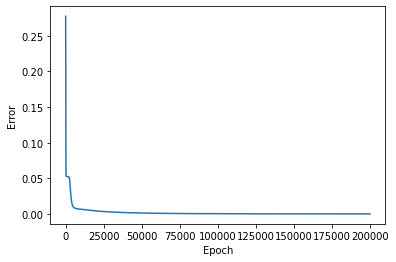

In [12]:
from matplotlib import pyplot as plt
run, err= np.loadtxt("error2.dat", unpack=True)
plt.plot(run, err)
plt.xlabel("Epoch")
plt.ylabel("Error")

In [14]:
print("\n#-------------------------------------------------\n" )
print("\nModified weights for hidden layer.\n" )
print(weight_hidden)
print("\nModified weights for output layer.\n" )
print(weight_output)
print("\n#-------------------------------------------------\n" )

print("\nderror_douto " )
print( derror_douto )
print( derror_douto.shape )
print("\ndino_dwo " )
print( douto_dino )
print( douto_dino.shape )
print("\ndno_dwo " )
print( dino_dwo )
print( dino_dwo.shape )
print("\nderror_dwo " )
print( derror_dwo )
print( derror_dwo.shape )
print("\nderror_dino = derror_douto * douto_dino") 
print( derror_dino )
print( derror_dino.shape )
print("\nweight outpout: dino_douth")
print( dino_douth ) 
print( dino_douth.shape ) 
print("\n derror_douth = np.dot(derror_dino , dino_douth.T) ") 
print( derror_douth )
print( derror_douth.shape )
print("\ndouth_dinh")
print(douth_dinh)
print("\ndinh_dwh")
print(dinh_dwh)
print("\nderror_wh")
print(derror_wh)



print("\nInput features " )
print( input_features)
print("\nInput for Hidden layer " )
print( input_hidden)
print("\nOutput for hidden layer "  )
print( output_hidden)


#-------------------------------------------------


Modified weights for hidden layer.

[[-2.11418790e-01  2.11984415e-01  2.11931619e-01  1.01686741e+00]
 [-3.29602325e-03  1.09339276e-03  1.32714939e-03  8.70774401e-01]
 [-5.31278239e-04 -1.40569636e-03 -1.20794089e-03  5.65064561e-01]]

Modified weights for output layer.

[[-5.89187893]
 [ 2.52129286]
 [ 2.6488355 ]
 [-2.27732727]]

#-------------------------------------------------


derror_douto 
[[ 0.01785193]
 [-0.00830419]
 [-0.00870513]
 [ 0.00161274]
 [ 0.01477685]
 [ 0.01818921]
 [ 0.00412879]
 [-0.03328472]
 [ 0.01678262]
 [-0.01089674]
 [-0.01547107]
 [-0.00113602]
 [ 0.01209576]
 [ 0.02053938]
 [-0.00082452]
 [-0.03439621]]
(16, 1)

dino_dwo 
[[0.10396285]
 [0.15494853]
 [0.20644217]
 [0.24031995]
 [0.24978164]
 [0.23603131]
 [0.20833144]
 [0.17886296]
 [0.10314444]
 [0.15334321]
 [0.20357222]
 [0.2397715 ]
 [0.24985369]
 [0.23547026]
 [0.21032913]
 [0.17945462]]
(16, 1)

dno_dwo 
[[0.44125142 0.55364801 0.55418587 0.99

# Testing the code:

In [16]:
#optimised weights for hidden layer.
weight_hidden =[[-0.19977359,  0.23970796,  0.20002789,  1.04523855],
        [-0.05363865, -0.13397817,  0.05301959,  0.9135291 ],
        [-0.05801965, -0.13830767,  0.05805095,  0.59429658]]


#Modified weights for output layer.
weight_output =[[-6.47888035],
        [ 2.76241115],
        [ 2.94848593],
        [-2.55717343]]

In [17]:
input_features=[6, 2, 3]

    # Input for hidden layer :
input_hidden = np.dot(input_features, weight_hidden)
 
 # Output from hidden layer :
output_hidden = sigmoid(input_hidden)
 
 # Input for output layer :
input_op = np.dot(output_hidden, weight_output)
 
 # Output from output layer :
output_op = sigmoid(input_op)

print(output_op*10)

[6.27822906]
